Import basic library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(rc={'figure.figsize':(12,7)})

import re
import numpy as np

Path of Datasets at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [ ]:
data_file_path = '/content/adult.data'
test_file_path = '/content/adult.test'

In [ ]:
columns_name = ['age', 'workclass', 'fnlwgt', 'education', 
                'education_num', 'marital_status', 'occupation', 
                'relationship','race', 'sex', 'capital_gain', 
                'capital_loss', 'hours_per_week', 'native_country',
                'y_feature'
]

train_data = pd.read_csv(data_file_path, sep=', ')
train_data.columns = columns_name

train_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y_feature
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
columns_name = ['age', 'workclass', 'fnlwgt', 'education', 
                'education_num', 'marital_status', 'occupation', 
                'relationship','race', 'sex', 'capital_gain', 
                'capital_loss', 'hours_per_week', 'native_country',
                'y_feature'
]

test_data = pd.read_csv(test_file_path, sep='rare_seperator', header=None, index_col=False)
test_data = test_data.iloc[1:]

test_data.to_csv('adult_test.csv', index=False, header=False) 

test_data = pd.read_csv('/content/adult_test.csv', sep=', ', header=None, index_col=None)
test_data.columns = columns_name

test_data['age'] = test_data['age'].apply(lambda x: re.sub('"', '', x)).astype(int)
test_data['y_feature'] = test_data['y_feature'].apply(lambda x: re.sub('."', '', x))

test_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y_feature
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
print("Here have "+str(train_data.shape[1])+" features with "+str(train_data.shape[0])+" entries for train")
print("Here have "+str(test_data.shape[1])+" features with "+str(test_data.shape[0])+" entries for test")

Here have 15 features with 32560 entries for train
Here have 15 features with 16281 entries for test


Here we can see we have 15 features with 32560 entries

---

Now we have to combine both the Data Set to create a common base for preprocessing

In [ ]:
data = pd.concat([train_data, test_data])
data.shape

(48841, 15)

Now we have total 48841 column

Now first convert our depend feature into binary form to be understood

In [ ]:
data['y_feature'] = data['y_feature'].apply(lambda x: 0 if x == '<=50K' else 1).astype(int)

In [ ]:
data['y_feature'].value_counts()

0    37154
1    11687
Name: y_feature, dtype: int64

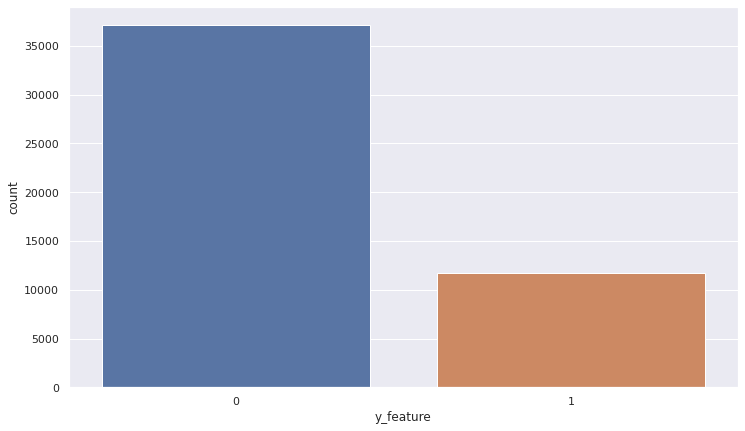

In [ ]:
sns.countplot(x='y_feature', data=data)
plt.show()

We have mismatch data set, so we have to handle that also in future

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y_feature
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


So now we have 48841 numbers of entries in 15 features

---

Now, lets try to understand our data set

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_num   48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  int64 
 13  native_country  48841 non-null  object
 14  y_feature       48841 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 7.2+ MB


From this information we can say that we have 9 categorical feature and 2 contineous feature, later we have to preprocess it

---

Now lets check whether we have missing or null value or not

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
y_feature         0
dtype: int64

From the above code we can understand that it does not have any null or missing values, That's good.<br>

**But But But...** by looking carefully to out data set we can see that the missing value are mention as **"?"** at many place, not as **NULL** or **None** value.<br>

For eg.



In [ ]:
data[data['occupation'].isnull()].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y_feature


So we have to manually handle our missing values

So, for ease, first replace the **?** to NAN value so that we can easly find out our missing value

In [ ]:
data = data.replace('?', np.NaN)

So now we have converted all **?** to **NAN** not a number, now we can find our total missing value by following code

In [ ]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
y_feature            0
dtype: int64

Now we can see total numbers of missing values per feature

---

<h1>Visualization</h1>
Let understand our data

In [ ]:
data.age.unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89])

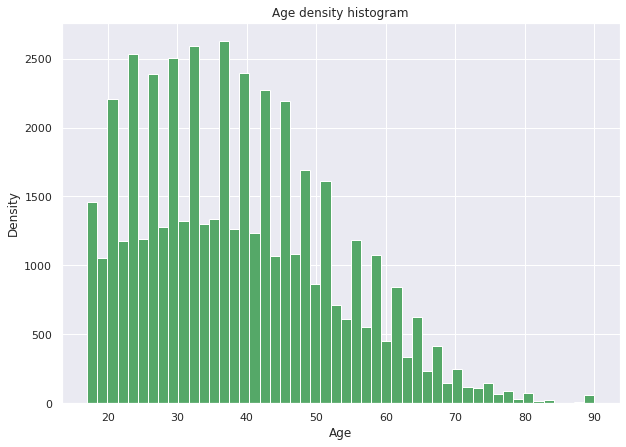

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data.age, bins=50, color='g')

plt.xlabel("Age") 
plt.ylabel("Density") 
plt.title('Age density histogram')
  
# Show plot 
plt.show() 

Most of the employee are between 20 to 45. And also their are people who are senior citizen above 70-75 of age, who are still working

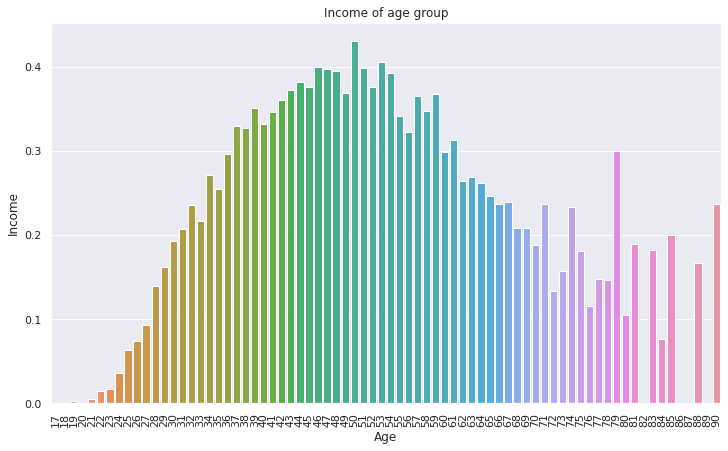

In [ ]:
sns.barplot(x="age",y="y_feature", data=data, ci=None)
# set_xticklabels(labels = g.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
plt.xlabel("Age") 
plt.ylabel("Income") 
plt.title('Income of age group')
plt.show()

35 - 65 age group earns much more than the freshers or aged people

---

In [ ]:
data.workclass.isnull().sum()

2799

So here we have some missing values, which we have to take care

In [ ]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1980
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

From above we can understand that their is much more values difference in this feature, we will have to take care for this

Here we also have missing values

In [ ]:
print("Out of "+str(data.workclass.shape[0])+" entries "+str(data.workclass.isnull().sum())+" missing values in WorkClass Feature")

Out of 48841 entries 2799 missing values in WorkClass Feature


We have 2799 missing values which is approx 6% of total values, we will not emit this rows either we replace this NAN.<br>

To handle categorical missing values the best way is to replace it with mode of other values. In this case it is "Private"

In [ ]:
data.workclass = data.workclass.fillna(data.workclass.mode()[0])
data.workclass.isnull().sum()

0

Now same as above we can relace every NAN to mode of each feature.

In [ ]:
data.occupation = data.occupation.fillna(data.occupation.mode()[0])
data.native_country = data.native_country.fillna(data.native_country.mode()[0])
data.native_country.isnull().sum(),data.occupation.isnull().sum()

(0, 0)

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
y_feature         0
dtype: int64

Now we dont have any null values.

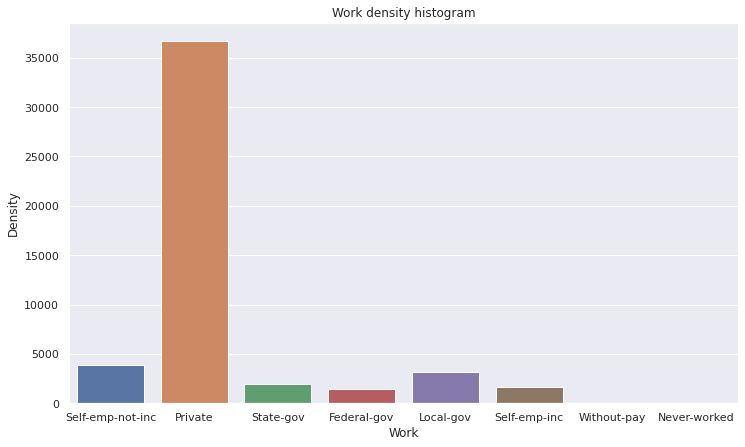

In [ ]:
sns.countplot(x='workclass', data=data) 
plt.xlabel("Work") 
plt.ylabel("Density") 
plt.title('Work density histogram')
plt.show() 

Their are so many people who are working in a private company

Here you can decerease the unique categorie (for eg: merge all govt service and name as **govt**

In [ ]:
data['workclass'] = data['workclass'].apply(lambda x: 'Govt' if x in ['State-gov', 'Federal-gov', 'Local-gov'] else x)

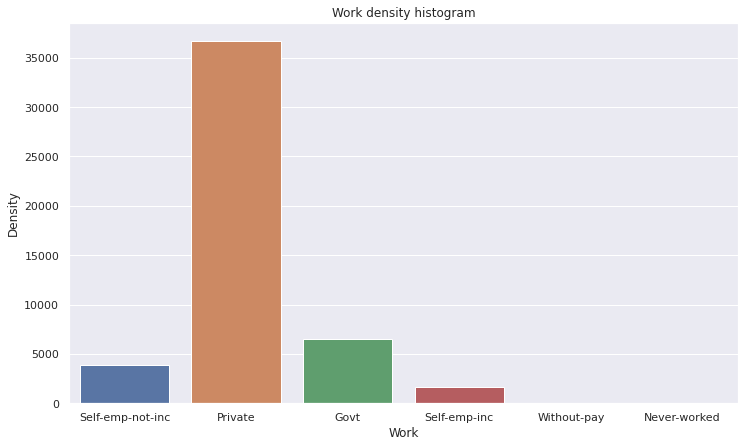

In [ ]:
sns.countplot(x='workclass', data=data) 
plt.xlabel("Work") 
plt.ylabel("Density") 
plt.title('Work density histogram')
plt.show() 

Now it look less complecated

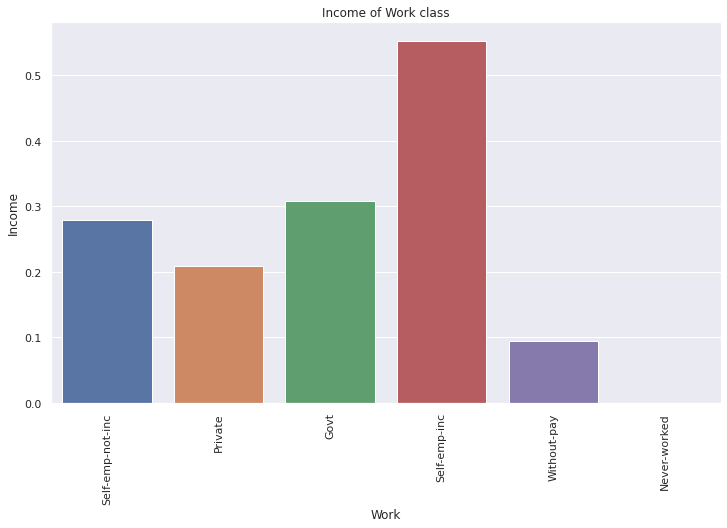

In [ ]:
sns.barplot(x="workclass",y="y_feature", data=data, ci=None)
# set_xticklabels(labels = g.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
plt.xlabel("Work") 
plt.ylabel("Income") 
plt.title('Income of Work class')
plt.show()

Self employed with income i.e. business men earn more then any work class

---

In [ ]:
data.sex.value_counts()

Male      32649
Female    16192
Name: sex, dtype: int64

Here we have around 16200 female, and 32600 male. now lets visualize it

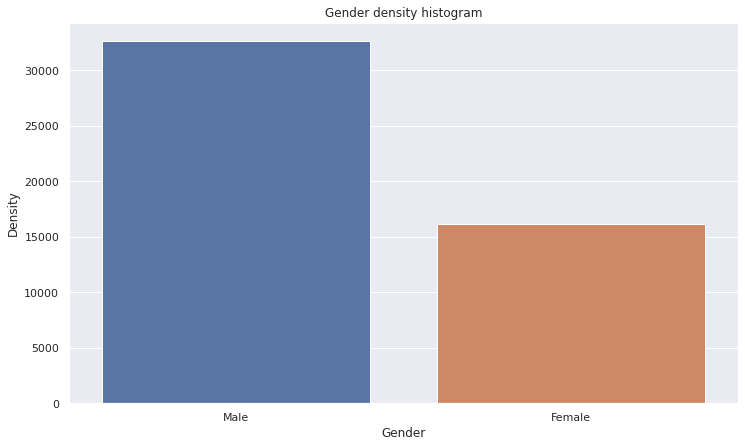

In [ ]:
sns.countplot(x='sex', data=data) 
plt.xlabel("Gender") 
plt.ylabel("Density") 
plt.title('Gender density histogram')
plt.show() 

---

Now we have education feature, lets look through this

In [ ]:
data.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

Here we have some unique value of different categories of a person's education, Which is between pre school to college degree.

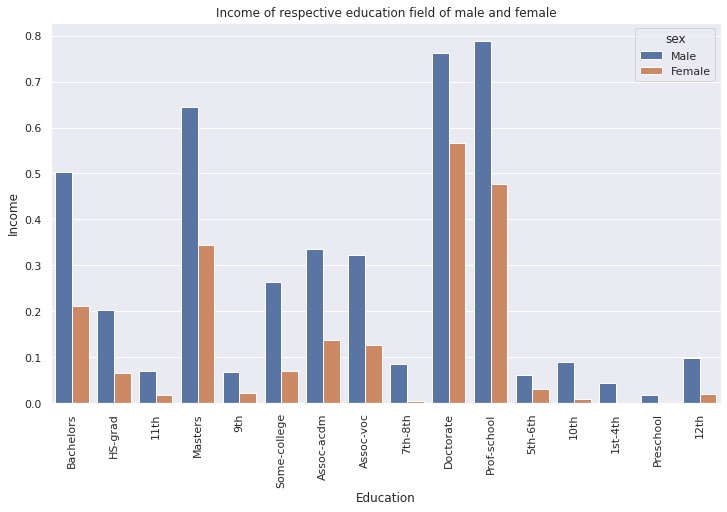

In [ ]:
sns.barplot(x="education",y="y_feature", hue='sex', data=data, ci=None)
# set_xticklabels(labels = g.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
plt.xlabel("Education") 
plt.ylabel("Income") 
plt.title('Income of respective education field of male and female')
plt.show()

Here we can see that person with Bachelors, Masters, Doctorate, and prof in school earn more money then who are yet have to clear Higher Secondary school.<br>
Also for every degree due to count of male is more we see males have bigger bar then female.

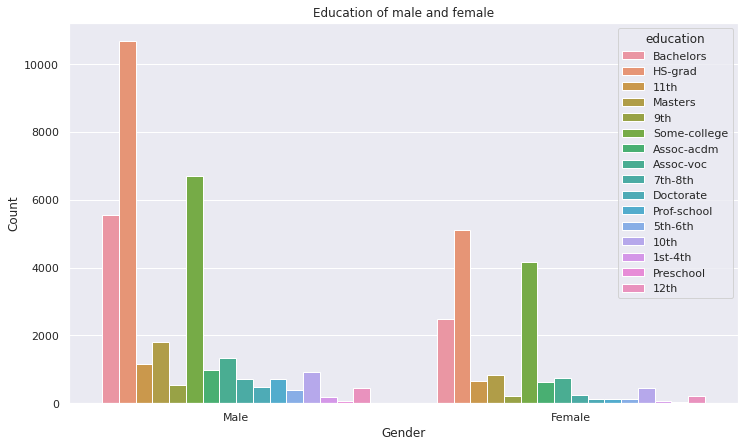

In [ ]:
sns.countplot(x="sex", hue='education', data=data, )
plt.xlabel("Gender") 
plt.ylabel("Count") 
plt.title('Education of male and female')
plt.show()

Here we can understand their are more male then female who have higher education qualification, This is also because of total number of male is higher than female

Here we have so many categories to see, lets summarize this categories to get more understanding.<br>
we can combine all the level of school from pre school to 12 to a single category which is school.

In [ ]:
data['education'] = data['education'].apply(lambda x: 'School' if x in ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Preschool', 'HS-grad'] else x)
data['education'] = data['education'].apply(lambda x: 'Assoc' if x in ['Assoc-voc', 'Assoc-acdm', 'Some-college'] else x)

Now, we have only 6 categories than 16 categories which is more likely to understand

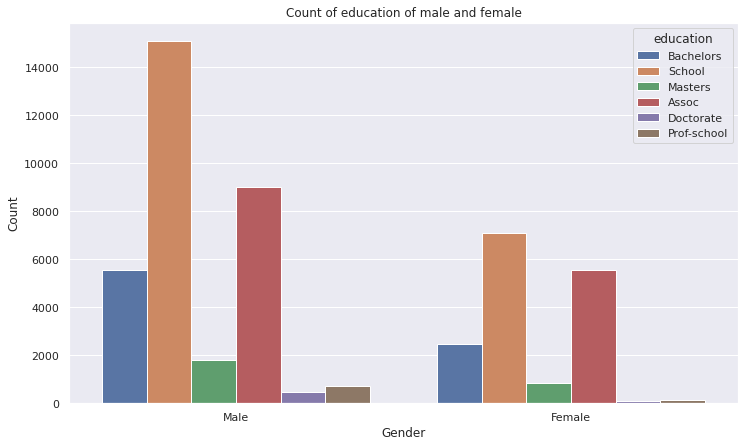

In [ ]:
sns.countplot(x="sex", hue='education', data=data, )
plt.xlabel("Gender") 
plt.ylabel("Count") 
plt.title('Count of education of male and female')
plt.show()

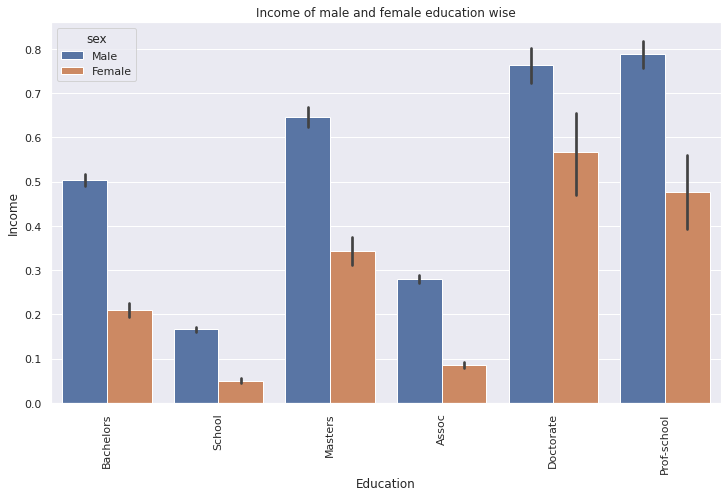

In [ ]:
sns.barplot(x="education",y="y_feature", hue='sex', data=data)
plt.xlabel("Education") 
plt.ylabel("Income") 
plt.title('Income of male and female education wise')
plt.xticks(rotation=90)
plt.show()

---

Lets visuallize **marital_status** feature

In [ ]:
data.marital_status.unique()

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

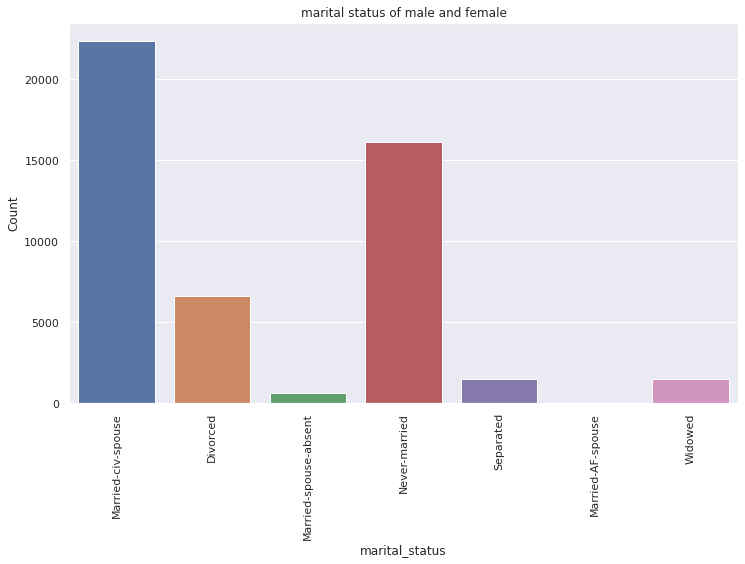

In [ ]:
sns.countplot(x="marital_status", data=data )
plt.xticks(rotation=90)
plt.xlabel("marital_status") 
plt.ylabel("Count") 
plt.title('marital status of male and female')
plt.show()

As we know we have people from 17 age group to 90 age group, their may be possibility of a person to be married and having spose, and still the number of single is second highest.

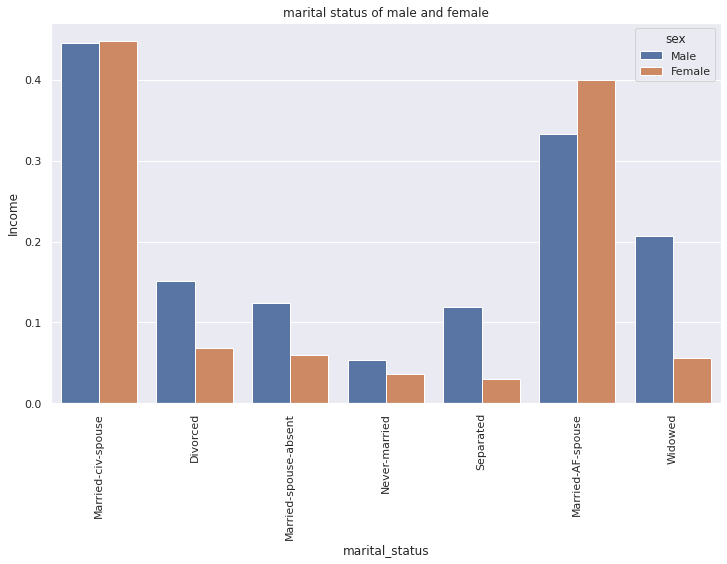

In [ ]:
sns.barplot(x="marital_status",y="y_feature", hue='sex', data=data, ci=None)
# set_xticklabels(labels = g.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
plt.xlabel("marital_status") 
plt.ylabel("Income") 
plt.title('marital status of male and female')
plt.show()

Surprisingly, married male and female tends to take more income then every other.

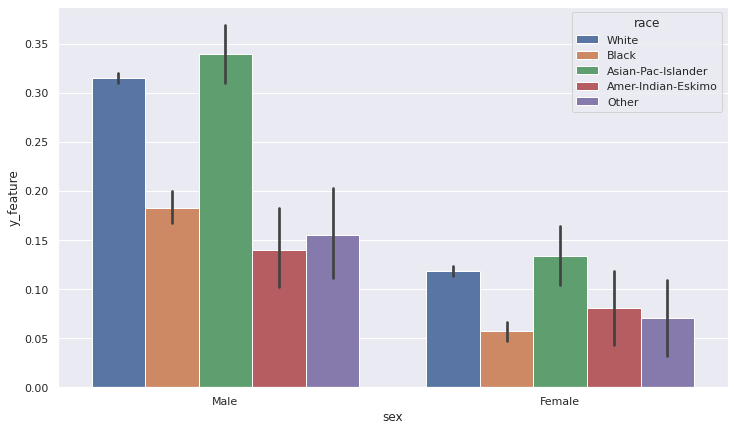

In [ ]:
sns.barplot(x="sex",y="y_feature", hue='race', data=data)
plt.show()

Wether it is Male or female people with race of "Asian-pac-Islander" tends to have more income then white, black, Indian or other

In [ ]:
data.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
data.native_country.value_counts()[:10]

United-States    44688
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
England            127
Name: native_country, dtype: int64

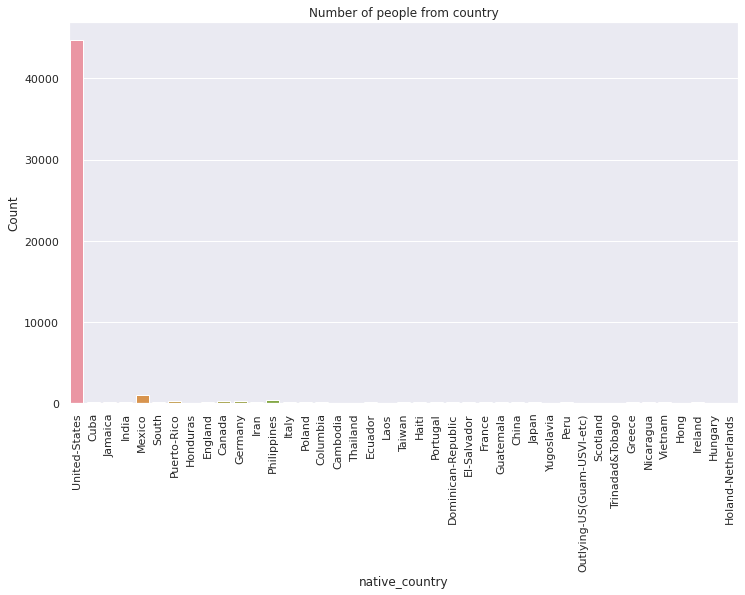

In [ ]:
sns.countplot(x="native_country", data=data)
plt.xticks(rotation=90)
plt.xlabel("native_country") 
plt.ylabel("Count") 
plt.title('Number of people from country')
plt.show()

Their is huge people working are from United States

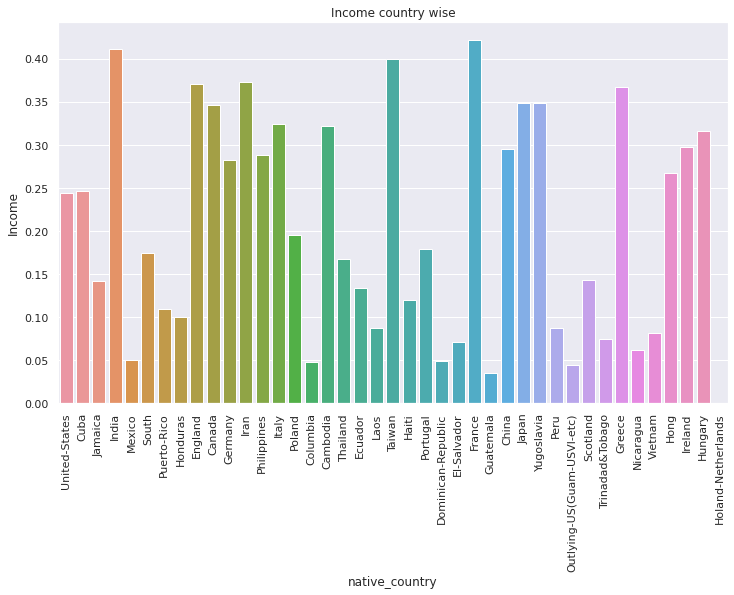

In [ ]:
sns.barplot(x="native_country", y="y_feature", data=data, ci=None)
plt.xticks(rotation=90)
plt.xlabel("native_country") 
plt.ylabel("Income") 
plt.title('Income country wise')
plt.show()

But people from France, India, Taiwan, Greece are top country who are earns more than United State

In [ ]:
data.occupation.value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5610
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Let try to understand how much person works in a week

In [ ]:
data.hours_per_week.unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69])

There are lots of value, we will take care of it

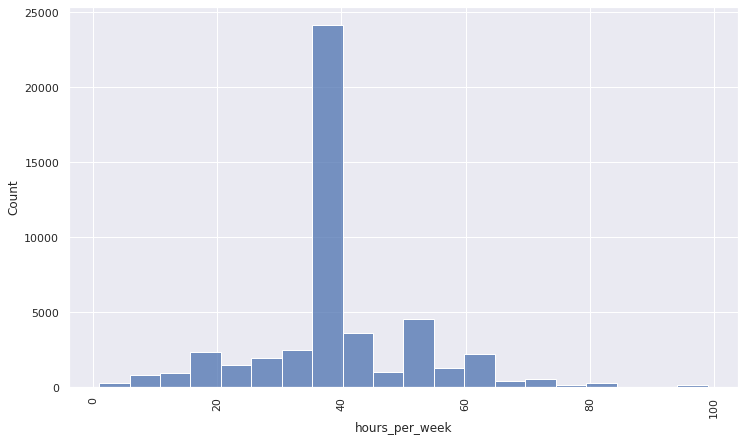

In [ ]:
sns.histplot(x='hours_per_week', data=data, bins=20)
plt.xticks(rotation=90)
1plt.show()

From above graph their are more employee who work 40 hours a week1 which is common everywhere. Their are so less people who hardly work more then 30-35 hours week and here we also have some people who are really working overtime.<br>

So what we can do is, lets group every working hours group to a specific group of hard worker, normal worker and less worker, so it will easyly understandable.

So here what we have done is that people working more than 60 hours, we consider them as Hard workers, people working less then 35 hours, we consider as Less workers, and rest of them are normal worker.

In [ ]:
data['hours_per_week'] = data['hours_per_week'].apply(lambda x: 'Hard_worker' if x >=60 else ('Normal_worker' if x>=35 and x<60 else 'Less_worker'))

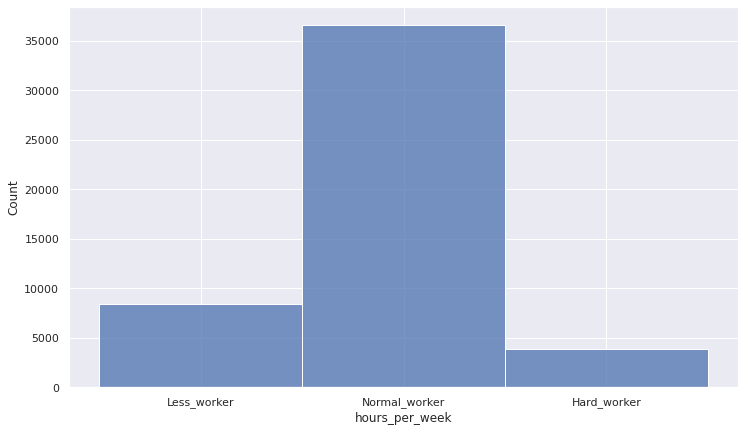

In [ ]:
sns.histplot(x='hours_per_week', data=data)
plt.show()

Now it is clear more people worked as per standard timing.

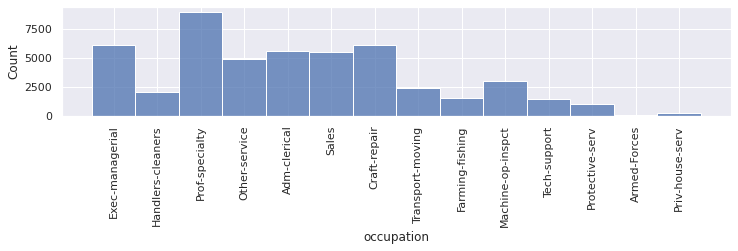

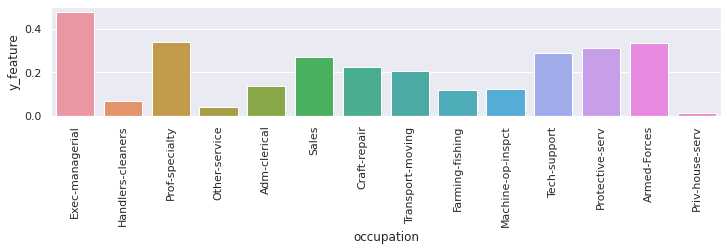

In [ ]:
sns.set(rc={'figure.figsize':(12,2)})

sns.histplot(x ='occupation', data=data)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x="occupation",y='y_feature', data=data, ci=None)
plt.xticks(rotation=90)
# plt.xlabel("Gender") 
# plt.ylabel("Count") 
# plt.title('Count of education of male and female')
plt.show()

From above graph we see that more people works at Prof-specility and Exec-managerial & They are also earning well<br>
Also we can see their are so less people who works for armed forces enen though they are getting good amount.

---

**Coorelation** <br>
Now Lets find out corr of all numeric feature<br>

Correlation compute relationship with other Series, excluding missing values.<br>
It gives us understanding of two column that both are how much correlated to each other. The higher the +value is, they are more directly proportional to each other, The higher the -value is, they are more Inversly proportional to each other<br>

Different Method to find corr()<br>

1.   **pearson** : Standard correlation coefficient
2.   **kendall** : Kendall Tau correlation coefficient
3.   **spearman** : Spearman rank correlation<br>
4.   **callable** : Callable with input two 1d ndarrays and returning a float.

In [ ]:
data.corr(method='pearson')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,y_feature
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230371
fnlwgt,-0.076628,1.000000,-0.038737,-0.003703,-0.004371,-0.013520,-0.006351
education_num,0.030940,-0.038737,1.000000,0.125145,0.080978,0.143692,0.332632
capital_gain,0.077229,-0.003703,0.125145,1.000000,-0.031440,0.082157,0.223015
capital_loss,0.056944,-0.004371,0.080978,-0.031440,1.000000,0.054467,0.147553
hours_per_week,0.071558,-0.013520,0.143692,0.082157,0.054467,1.000000,0.227687
y_feature,0.230371,-0.006351,0.332632,0.223015,0.147553,0.227687,1.000000


Their is no such relationship is visible between feature. But also lets try to visualize it so it can be more easy to understand

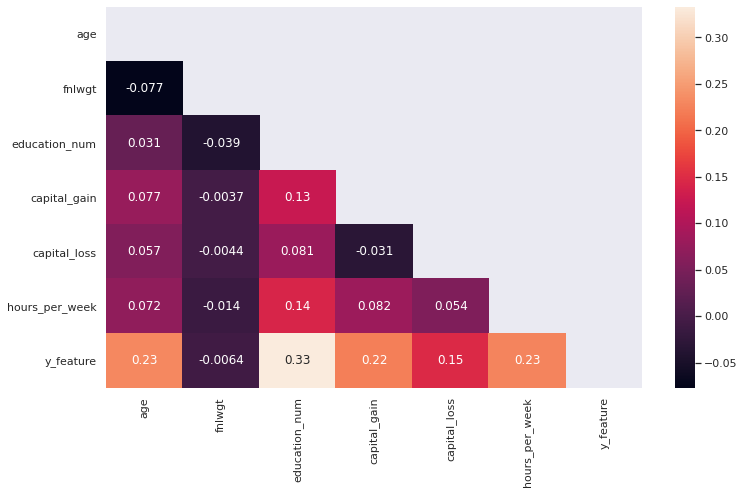

In [ ]:
mask = np.triu(np.ones_like(data.corr(method='pearson'))) 
dataplot = sns.heatmap(data.corr(method='pearson'), annot=True, mask=mask) 

Clearly no relationship with others

---

<h1>Preprocessing

Now lets start converting our dataset in computer understabdable form

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_num   48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  object
 13  native_country  48841 non-null  object
 14  y_feature       48841 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 7.2+ MB


<h3>Label Encoder


We have 9 categorical feature that w have to convert using Label Encoder<br>

LabelEncoder encodes labels by assigning them numbers. Thus, if the feature is class with values such as ['A', 'B', "C", 'D'], using LabelEncoder may encode color string label as [0, 1, 2, 3]. Here is an example.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_column = ['workclass', 'education', 'marital_status', 
                      'occupation', 'relationship', 'race', 'sex', 
                      'hours_per_week', 'native_country']

data[categorical_column].head()

Here we have selected all columns name of which data type of value is "object"

In [ ]:
for i in categorical_column:
  data[i] = le.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48841 non-null  int64
 1   workclass       48841 non-null  int64
 2   fnlwgt          48841 non-null  int64
 3   education       48841 non-null  int64
 4   education_num   48841 non-null  int64
 5   marital_status  48841 non-null  int64
 6   occupation      48841 non-null  int64
 7   relationship    48841 non-null  int64
 8   race            48841 non-null  int64
 9   sex             48841 non-null  int64
 10  capital_gain    48841 non-null  int64
 11  capital_loss    48841 non-null  int64
 12  hours_per_week  48841 non-null  int64
 13  native_country  48841 non-null  int64
 14  y_feature       48841 non-null  int64
dtypes: int64(15)
memory usage: 7.2 MB


Above we have iterate to every column and transform every feature to label Encoder.<br>
Now we can see we have no categorical feature, all are transorm to contineous.<br>
For this we have to use comand like **fit_transform.**  Which fit every value and transform it to numbers.

---

<h3>Standardization

Now we have divided our data set to Dependent as "y", and independent feature as "X"<br>

After Label Encoding, here we have applied **Standardization** using **StandardScaler.** <br>

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [ ]:
X = data.drop('y_feature', axis=1)
y = data['y_feature']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now split our data set to Train and test, for testing and validation of our model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

<h2>Modeling

Import all the Libaries for modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

<H4>Confusion Matrix</H4> <br>

The confusion matrix provides a much more granular way to evaluate the results of a classification algorithm than just accuracy. It does this by dividing the results into two categories that join together within the matrix: the predicted labels and the actual labels of the data points. <br>

Let’s describe what each element of this matrix means so that you can see why it is so useful. When we see a real example these letters (TP, FP, FN and TN) will be replaced by numbers from which we can derive various insights:

TP — True Positives: <br>
FP — False Positives: <br>
FN — False Negatives: <br>
TN — True Negatives:

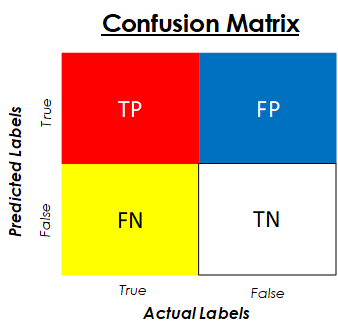

In [ ]:
from IPython.display import Image
Image(filename='/content/1_914gv9K7LLmA6Z6IcDLMHg.png') 

Accuracy = Correctly predicted / Total Labels

Precision = TP / TP+FP

Re-Call = TP / TP+FN

F1 Score = 2 (Precision * Re-Call) / Precision + Re-Call

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))

A user define function **generate_model_report** for showing result of a pertocular model

<H2>LogisticRegression</H2> <br>

Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables.

A binary outcome is one where there are only two possible scenarios True or False / 1 or 0 / etc. 

Independent variables are those variables or factors which may influence the Target.

So: Logistic regression is the correct type of analysis to use when you’re working with binary data. You know you’re dealing with binary data when the output or dependent variable is dichotomous or categorical in nature; in other words, if it fits into one of two categories (such as “yes” or “no”, “pass” or “fail”, and so on).

For out put it give probablity of the classes, for that it uses sigmoid function

sigmoid finction = 1 / 1 + e^ -y

where, y = mx + c

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score = cross_val_score(lr,X,y,cv=5)
score.mean()

0.8249216902252012

In [ ]:
y_pred = lr.predict(X_test)

generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.8236753939694751
Precision =  0.7103825136612022
Recall =  0.43976060369502995
F1 Score =  0.5432336869173898



array([[11586,   689],
       [ 2153,  1690]])

Here we get accuracy as 82%

and F1 Score as 54%

This is not so good model

---

<h2>DecisionTreeClassifier</h2>

Decision Tree is used for Supervised learning can use for classification and regression

In Decision Tree we divide feature based on the output until we get pure output

For DT Classification<br>
Split is done on the basis of elements of a class.

**Entropy & Gini Impurity**  Technique is used to calculate purity of split OF A PERTICULAR NODE
**Entropy** (0(pure) to 1(impure)) = -P(+) log2 (P+) -(P-) log 2  (P-)

**Gini** (0(pure) to 0.5(impure)) =  1-( P(+)2 - P(-)2) 

**Information Gain** = H(S) -  Σ |Sv| H(Sv)
(H(S) =entropy of root)           |S|
(H(Sv) =entropy of leaf node),(|S|= Total (+) & (-))
(|Sv|= (+) & (-) after split)

**Advantages** <br>
Advantages of Decision Tree
1.	Clear Visualization: The algorithm is simple to understand, interpret and visualize as the idea is mostly used in our daily lives
2.	Simple and easy to understand (like If else)
3.	Decision Tree can handle both continuous and categorical variables.
4.	No feature scaling required (standardization and normalization) uses rule based approach instead of distance calculation.
5.	Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Decision Tree unlike curve based algorithms.
6.	Can automatically handle missing values.
7.	Decision Tree is usually robust to outliers and can handle them automatically.
8.	Less Training Period compare to Random Forest
9.	It is Not sensitive to imbalance dataset because it follows its own hierarchy.

**Disadvantages** <br>
Disadvantages of Decision Tree
1.	Over fitting  (HyperParameter DecisionTree Prouning can use to remove this)
2.	Low bias High variance
3.	Adding a new feature can lead to re-generation
4.	Not suitable for large datasets


<h4>class_weight</h4>
Here class_weight parameter is used. It means If their is mismatch in dataset we can give more weightage to lower class feature then higher class feature. so that they can acts as equal.

Apart from class weights, we can do Upsampling to lower class or we can do down sampling to higher class

In [ ]:
dt_cl = DecisionTreeClassifier(class_weight='balanced')
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
score = cross_val_score(dt_cl,X_train,y_train,cv=5)
score.mean()

0.8129754791447585

In [ ]:
dt_cl.score(X_train,y_train),dt_cl.score(X_test,y_test)

(0.9996638450019864, 0.8111428216900359)

Validation accuracy = 99%

Test set accuracy = 81%

In [ ]:
y_pred = dt_cl.predict(X_test)

generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.8111428216900359
Precision =  0.6044444444444445
Recall =  0.6016133229247983
F1 Score =  0.6030255607720396



array([[10762,  1513],
       [ 1531,  2312]])

Here we get accuracy as 81%

and F1 Score as 60%

This is not so good model but good as compare to Logistic regression.

Lets try to hyper tune our model

<h3>HyperParameter Tuning of Decision Tree

In [ ]:
params = {"splitter"                  : ["best","random"] ,
          "max_depth"                 : [ 3, 4, 5, 6, 8, 10, 12, 15],
          "min_samples_leaf"          : [ 1,2,3,4,5 ],
          "min_weight_fraction_leaf"  : [0.1,0.2,0.3,0.4],
          "max_features"              : ["auto","log2","sqrt",None ],
          "max_leaf_nodes"            : [None,10,20,30,40,50,60,70],
          "criterion"                 : ['gini', 'entropy']
          }

dtree_cls = GridSearchCV(dt_cl,params,cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,verbose=3)

In [ ]:
dtree_cls.fit(X_train,y_train)

Fitting 5 folds for each of 20480 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 2092 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 3884 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 6188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9004 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12332 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16172 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 20524 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 25388 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 30764 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 36652 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 43052 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 49964 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 57388 ta

datetime.datetime(2021, 1, 15, 7, 20, 51, 535376)

In [ ]:
dtree_cls.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

'''

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

 '''

 This are the best parameter after duing hyper tuning of decision

In [ ]:
y_pred = dtree_cls.predict(X_test)
generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.7061670182404765
Precision =  0.44075892264826855
Recall =  0.8644288316419464
F1 Score =  0.5838312829525484



array([[8060, 4215],
       [ 521, 3322]])

Here we get accuracy as 70%

and F1 Score as 58%

Not satesifactory

---

<h2>RandomForestClassifier</h2>

It is Bagging technique in Ensemble Technique. It is combination of many decision tree.

**Random Forest**: The base estimator in random forest is **Decision Tree.** Random forest selects a set of features that are used to decide the best split at each node of DT. Steps:-

1. Random subset is created from the original dataset.
2. At each node in Decision Tree, only random set of feature are considered to decide best split.
3. A Decision Tree model is fitted on each of the subsets.
4. Final o/p is average of every Decision Tree.

Important Parameters (n_estimators, criterion, min_samples_split, max_features, n_jobs)


In [ ]:
rf_cls = RandomForestClassifier(class_weight='balanced')
rf_cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_cls.score(X_train,y_train),rf_cls.score(X_test,y_test)

(0.9996638450019864, 0.8548827397940191)

Validation accuracy = 99%

Test set accuracy = 85%

In [ ]:
y_pred = rf_cls.predict(X_test)
generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.8548827397940191
Precision =  0.7360326428123039
Recall =  0.6102003642987249
F1 Score =  0.6672357376582728



array([[11434,   841],
       [ 1498,  2345]])

Here we get accuracy as 85%

and F1 Score as 66%

Better than Decision Tree, still not good.

Lets try HyperTuning

In [ ]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

max_depth = [int(i) for i in np.linspace(5,30,num=6)]

max_features = ['auto','sqrt']

min_samples_split = [4,5,7,10,15,100]

min_samples_leaf = [1,5,7,10]

min_weight_fraction_leaf =[0.1,0.2,0.4,0.5,0.7,0.6]

ran_params = {'criterion':['gini','entropy'],
              'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'max_features' : max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf,
              "max_leaf_nodes":[None,10,20,30,40,50,60,70]}


In [ ]:
rand_cls = RandomizedSearchCV(rf_cls,param_distributions=ran_params,
                              n_iter=100,cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=3,n_jobs=-1)

rand_cls.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 17.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 67.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [ ]:
'''
{class_weight='balanced',
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}
 '''

rand_cls.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}

'''

{class_weight='balanced',
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}
 
 '''

 This the Hypertuned Parameters of a Randomforest classifier

In [ ]:
y_pred = rand_cls.predict(X_test)
generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.8506018116391612
Precision =  0.6618542747575006
Recall =  0.7634660421545667
F1 Score =  0.7090381826969551



array([[10776,  1499],
       [  909,  2934]])

Here we get accuracy as 85%

and F1 Score as 71%

This is best till now

---

<h2>XGBoost</h2>  

XGBoost uses Regularization λ and LR  α as a main parameter

Create a base model which give average of target target compute residual (y – yhat) now it will be our new target column, now create a binary Decision Tree (stump) (weather it as more than 2 classes) where xi is usual but yi is our new column Now calculate Similarity weight of both leaf node and root of the DT and calculate gain (sum of similarity weight of leaf minus similarity weight of root) select DT which has higher value with parameter Gama.
After creating first model we have to create new data points by the help of formula:-

New prediction = previous model prediction + α  ( output )

Similarity weight=    Σ (Residual)2 /
                   Σ(prob(1-prob)) + λ


In [ ]:
xg_cls = xgb.XGBClassifier()
xg_cls.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xg_cls.predict(X_test)
generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.8635686809777888
Precision =  0.7976104272266473
Recall =  0.5732500650533437
F1 Score =  0.6670704012112036



array([[11716,   559],
       [ 1640,  2203]])

Here we get accuracy as 86%

and F1 Score as 66%

Not the best.

---

<h2>KNeighborsClassifier</h2>

KNN is for Supervised learning for Regression and Classification both

It is also called Lazy learning because it doesn’t build generalize model during training, so the testing phase is important where actual job is done.

**Classification** <br>
In KNN classification first we have to select the k value, now find k nearest points from the new point using Euclidean distance or Manhattan distance from the dataset, now the new point belong to that group which has highest number of  nearest point.

How to choose value of K<br>
K Value is a hyper parameter which needs to choose at the time of model building. 

If there are outliers it difficult for classification in KNN.

It is impacted by the imbalanced dataset.



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
generate_model_report(y_test, y_pred)
print()

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

Accuracy =  0.8282044918724407
Precision =  0.6605861244019139
Recall =  0.5748113453031486
F1 Score =  0.6147210240712397



array([[11140,  1135],
       [ 1634,  2209]])

Here we get accuracy as 82%

and F1 Score as 61%

___

<h1>Conclusion:-</h2>

The best result we can get from the  Random forest Classifier with following parameters

'''
{class_weight='balanced',
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}
 '''

 Which Gives us Result as:- <br>


*   Accuracy =  0.8506018116391612
*   F1 Score =  0.7090381826969551